In [13]:
import pandas as pd
import matplotlib.pyplot as plt
cal_path = './src/vital_csvs/dataframe_calories_active.csv'
dist_path = './src/vital_csvs/dataframe_distance.csv'
heart_path = './src/vital_csvs/dataframe_heartrate.csv'
steps_path = './src/vital_csvs/dataframe_steps.csv'

In [27]:
def process_data(csv, kind):
    if kind == "calories":
        df = pd.read_csv(csv)
        df.drop(columns=['id','timezone_offset','type'],inplace=True)
        df['timestamp'] = pd.to_datetime(df['timestamp'].str.split("+").str[0])
        df['start'] = pd.to_datetime(df['start'].str.split("+").str[0])
        df['end'] = pd.to_datetime(df['end'].str.split("+").str[0])
        df.sort_values('timestamp')
        return df
    elif kind == "distance":
        df = pd.read_csv(csv)
        df.drop(columns=['id','timezone_offset','type'],inplace=True)
        df['timestamp'] = pd.to_datetime(df['timestamp'].str.split("+").str[0])
        df['start'] = pd.to_datetime(df['start'].str.split("+").str[0])
        df['end'] = pd.to_datetime(df['end'].str.split("+").str[0])
        df.sort_values('timestamp')
        return df
    elif kind == "heartrate":
        df = pd.read_csv(csv)
        df.drop(columns=['id','timezone_offset','type'],inplace=True)
        df['timestamp'] = pd.to_datetime(df['timestamp'].str.split("+").str[0])
        df.sort_values('timestamp')
        return df
    elif kind == "steps":
        df = pd.read_csv(csv)
        df.drop(columns=['id','timezone_offset','type'],inplace=True)
        df['timestamp'] = pd.to_datetime(df['timestamp'].str.split("+").str[0])
        df['start'] = pd.to_datetime(df['start'].str.split("+").str[0])
        df['end'] = pd.to_datetime(df['end'].str.split("+").str[0])
        df.sort_values('timestamp')
        return df
    else:
        raise LookupError("Invalid Data Type")

In [28]:
cal_df = process_data(cal_path,"calories")
dist_df = process_data(dist_path,"distance")
heart_df = process_data(heart_path,"heartrate")
steps_df = process_data(steps_path,"steps")

In [29]:
cal_df = cal_df.sort_values('timestamp')
dist_df = dist_df.sort_values('timestamp')
heart_df = heart_df.sort_values('timestamp')
steps_df = steps_df.sort_values('timestamp')

In [39]:
heart_df

,unit,timestamp,value
0,bpm,2023-11-10 00:20:37,85.0
1,bpm,2023-11-10 00:20:46,82.0
2,bpm,2023-11-10 00:21:12,79.0
3,bpm,2023-11-10 00:40:36,77.0
4,bpm,2023-11-10 00:40:39,84.0
...,...,...,...
2428,bpm,2023-11-17 23:41:35,80.0
2429,bpm,2023-11-17 23:46:39,81.0
2430,bpm,2023-11-17 23:46:57,83.0
2431,bpm,2023-11-17 23:47:09,86.0


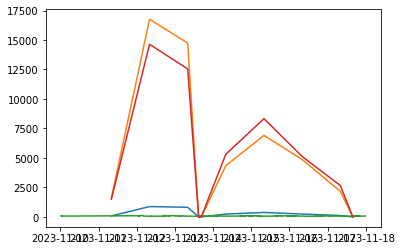

In [35]:
plt.plot(cal_df['timestamp'],cal_df['value'])
plt.plot(dist_df['timestamp'],dist_df['value'])
plt.plot(heart_df['timestamp'],heart_df['value'])
plt.plot(steps_df['timestamp'],steps_df['value'])
plt.show()

In [47]:
data = [cal_df,dist_df,heart_df,steps_df]
d2 = ['calories','distance','heartrate','steps']
for i in enumerate(data):
    print(d2[i[0]])
    filename = f'src/vital_csvs/analysis_dataframe_{d2[i[0]]}.csv'
    i[1].to_csv(filename,index=False)


calories
distance
heartrate
steps
